In [1]:
import pandas as pd

github_csv_url = 'https://raw.githubusercontent.com/jacobalcu/Telco-Customer-Churn/refs/heads/main/Telco_Customer_Churn.csv'

try:
  df = pd.read_csv(github_csv_url)
  print("CSV file loaded successfully!")
  display(df.head())
except Exception as e:
  print(f"Error loading CSV file: {e}")

CSV file loaded successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Task
Load the CSV file from "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv" into a pandas DataFrame and then perform data exploration by displaying basic information, getting descriptive statistics, checking for missing values, exploring unique values, and visualizing data distribution.

## Display basic information

### Subtask:
Show the first few rows, the column names and their data types, and the dimensions of the DataFrame.


**Reasoning**:
Display the first few rows, the column names and their data types, and the dimensions of the DataFrame to understand its structure and content.



In [ ]:
display(df.head())
display(df.info())
display(df.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

(7043, 21)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


## Get descriptive statistics

### Subtask:
Calculate summary statistics for numerical columns and value counts for categorical columns.


**Reasoning**:
Calculate summary statistics for numerical columns and value counts for categorical columns as per the instructions.



In [ ]:
display("Descriptive Statistics for Numerical Columns:")
display(df.describe())

display("Value Counts for Categorical Columns:")
for col in df.columns:
    if df[col].dtype == 'object':
        display(f"Value Counts for column: {col}")
        display(df[col].value_counts())

'Descriptive Statistics for Numerical Columns:'

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


'Value Counts for Categorical Columns:'

'Value Counts for column: customerID'

,count
customerID,
3186-AJIEK,1
7590-VHVEG,1
5575-GNVDE,1
8775-CEBBJ,1
2823-LKABH,1
...,...
6713-OKOMC,1
1452-KIOVK,1
9305-CDSKC,1


'Value Counts for column: gender'

,count
gender,
Male,3555
Female,3488


'Value Counts for column: Partner'

,count
Partner,
No,3641
Yes,3402


'Value Counts for column: Dependents'

,count
Dependents,
No,4933
Yes,2110


'Value Counts for column: PhoneService'

,count
PhoneService,
Yes,6361
No,682


'Value Counts for column: MultipleLines'

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


'Value Counts for column: InternetService'

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


'Value Counts for column: OnlineSecurity'

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


'Value Counts for column: OnlineBackup'

,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526


'Value Counts for column: DeviceProtection'

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


'Value Counts for column: TechSupport'

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


'Value Counts for column: StreamingTV'

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


'Value Counts for column: StreamingMovies'

,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526


'Value Counts for column: Contract'

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


'Value Counts for column: PaperlessBilling'

,count
PaperlessBilling,
Yes,4171
No,2872


'Value Counts for column: PaymentMethod'

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


'Value Counts for column: TotalCharges'

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


'Value Counts for column: Churn'

,count
Churn,
No,5174
Yes,1869


## Check for missing values

### Subtask:
Identify and quantify any missing values in the DataFrame.


**Reasoning**:
Use the `.isnull()` method on the DataFrame to create a boolean DataFrame indicating missing values and then use the `.sum()` method on the resulting boolean DataFrame to count the number of missing values per column. Finally, display the results to see the total count of missing values for each column in the DataFrame.



In [ ]:
missing_values_count = df.isnull().sum()
display("Missing values count per column:")
display(missing_values_count)

'Missing values count per column:'

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Explore unique values

### Subtask:
Examine the unique values in categorical columns to understand their variety.


**Reasoning**:
Iterate through the columns, identify categorical columns (object type), and display their unique values.



In [ ]:
display("Unique values in categorical columns:")
for col in df.columns:
    if df[col].dtype == 'object':
        display(f"Unique values for column: {col}")
        display(df[col].unique())
        print("\n")

'Unique values in categorical columns:'

'Unique values for column: customerID'

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

'Unique values for column: gender'

array(['Female', 'Male'], dtype=object)

'Unique values for column: Partner'

array(['Yes', 'No'], dtype=object)

'Unique values for column: Dependents'

array(['No', 'Yes'], dtype=object)

'Unique values for column: PhoneService'

array(['No', 'Yes'], dtype=object)

'Unique values for column: MultipleLines'

array(['No phone service', 'No', 'Yes'], dtype=object)

'Unique values for column: InternetService'

array(['DSL', 'Fiber optic', 'No'], dtype=object)

'Unique values for column: OnlineSecurity'

array(['No', 'Yes', 'No internet service'], dtype=object)

'Unique values for column: OnlineBackup'

array(['Yes', 'No', 'No internet service'], dtype=object)

'Unique values for column: DeviceProtection'

array(['No', 'Yes', 'No internet service'], dtype=object)

'Unique values for column: TechSupport'

array(['No', 'Yes', 'No internet service'], dtype=object)

'Unique values for column: StreamingTV'

array(['No', 'Yes', 'No internet service'], dtype=object)

'Unique values for column: StreamingMovies'

array(['No', 'Yes', 'No internet service'], dtype=object)

'Unique values for column: Contract'

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

'Unique values for column: PaperlessBilling'

array(['Yes', 'No'], dtype=object)

'Unique values for column: PaymentMethod'

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

'Unique values for column: TotalCharges'

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

'Unique values for column: Churn'

array(['No', 'Yes'], dtype=object)

## Visualize data distribution

### Subtask:
Create visualizations like histograms or box plots to see the distribution of numerical data.


**Reasoning**:
Create histograms for 'tenure', 'MonthlyCharges', and 'TotalCharges' to visualize their distributions and display the plots.



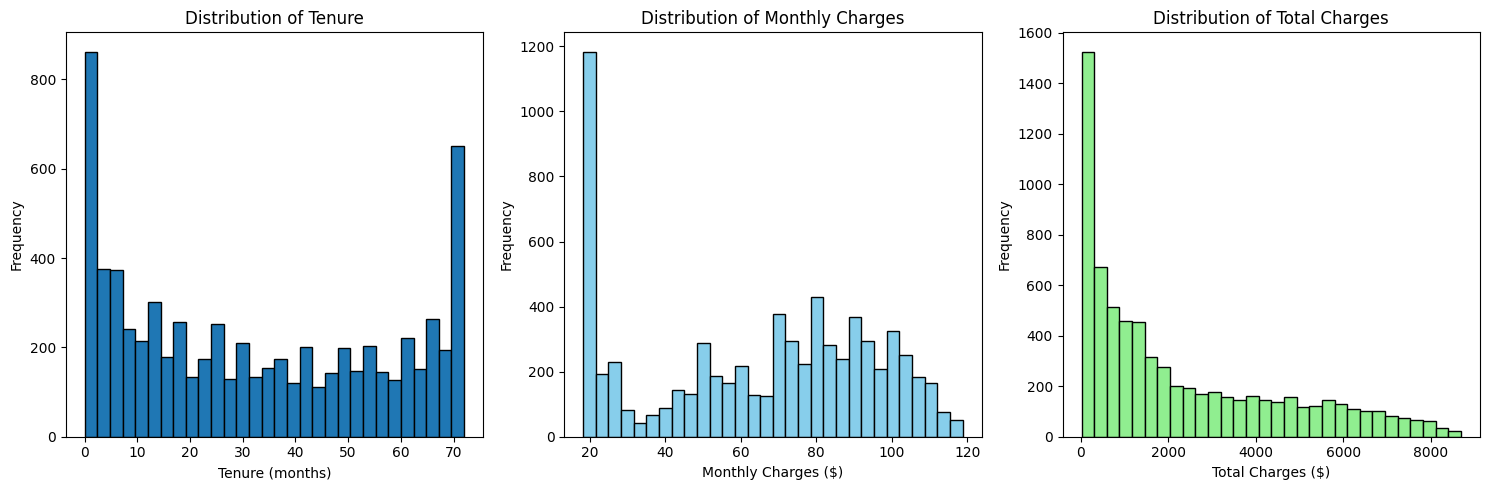

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['tenure'], bins=30, edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['MonthlyCharges'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
# Convert 'TotalCharges' to numeric, coercing errors to NaN, then drop NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_cleaned = df.dropna(subset=['TotalCharges'])
plt.hist(df_cleaned['TotalCharges'], bins=30, edgecolor='black', color='lightgreen')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Explore Relationships

### Subtask:
Explore relationships between numerical columns using a correlation matrix.

**Reasoning**:
Calculate the correlation matrix for the numerical columns to understand the linear relationships between them and display it using a heatmap for better visualization.

'Correlation Matrix:'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


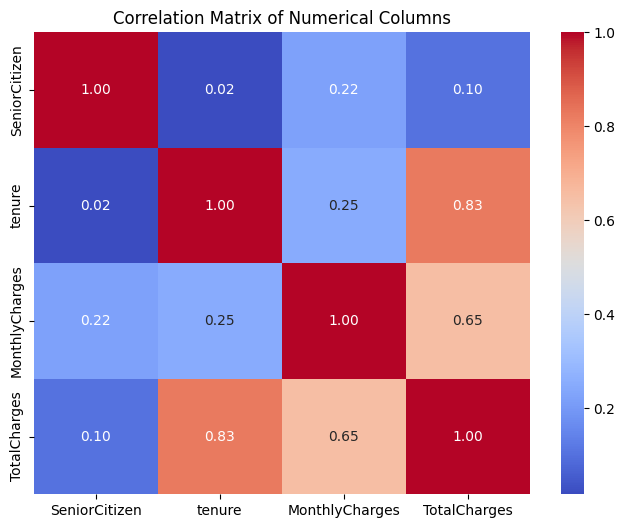

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
display("Correlation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## Separate X (features) and y (label or target)

In [ ]:
# Separate features (X) by dropping the 'Churn' and 'customerID' columns
X = df.drop(['Churn', 'customerID'], axis=1)

# Separate the target variable (y)
y = df['Churn']

# Display the first few rows of X and y to confirm
print("Features (X):")
display(X.head())

print('Target (y):')
display(y.head())

# Display the shapes to confirm
print(f"\nShape of X: {X.shape}")
print("Shape of y:", y.shape)

Features (X):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


Target (y):


,Churn
0,No
1,No
2,Yes
3,No
4,Yes



Shape of X: (7043, 19)
Shape of y: (7043,)


## Separate Categorical and Numerical Columns into 2 subsets of the df

### Lists of Categorical and Numerical Features
* `categorical_features`
* `numerical_features`

### Categorical and Numerical DF's
* `X_categorical`
* `X_numerical`

In [ ]:
# Identify categorical columns, excluding 'customerID'
categorical_features = [col for col in X.columns if X[col].dtype == 'object' and col != 'customerID']
numerical_features = [col for col in X.columns if X[col].dtype != 'object']

# Select the categorical columns
X_categorical = X[categorical_features]
X_numerical = X[numerical_features]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.pipeline import Pipeline # Import Pipeline
import pandas as pd

# Create a pipeline for numerical features: Imputation followed by Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Handle missing values
    ('scaler', StandardScaler()) # Scale the features
])

# Create a ColumnTransformer
# It applies OneHotEncoder to the identified categorical features
# It applies the numerical_transformer pipeline to numerical features
# remainder='passthrough' is not needed if all columns are handled by transformers
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', numerical_transformer, numerical_features) # Use the numerical pipeline
    ],
    # We don't need remainder='passthrough' if all columns are in either cat or num features
)

# Now, fit and transform X using the updated column_transformer
X_transformed = column_transformer.fit_transform(X)


# Display the categorical and numerical features lists to confirm
print("Categorical Features to be encoded:")
print(categorical_features)
print("\nNumerical Features to be imputed and scaled:") # Update message
print(numerical_features)

# The column_transformer is now ready to be used to fit and transform your X data.
# X_transformed now contains the preprocessed data as a NumPy array.

Categorical Features to be encoded:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical Features to be imputed and scaled:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Add feature names back to dataframe

In [ ]:
import pandas as pd
import numpy as np

# Get the feature names directly from the fitted ColumnTransformer
# This ensures the names are in the correct order matching X_transformed
all_feature_names = column_transformer.get_feature_names_out()

# Create a new DataFrame from the transformed array with the correct column names
# Ensure the index is preserved from the original DataFrame if needed
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names, index=X.index)

# Display the first few rows of the transformed DataFrame
display("Transformed DataFrame (X_transformed_df):")
display(X_transformed_df.head())

# Display the shape of the transformed DataFrame
print("\nShape of the transformed DataFrame:", X_transformed_df.shape)

'Transformed DataFrame (X_transformed_df):'

,cat__gender_Female,cat__gender_Male,cat__Partner_No,cat__Partner_Yes,cat__Dependents_No,cat__Dependents_Yes,cat__PhoneService_No,cat__PhoneService_Yes,cat__MultipleLines_No,cat__MultipleLines_No phone service,...,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.439916,-1.277445,-1.160323,-0.994971
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.439916,0.066327,-0.259629,-0.173876
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.439916,-1.236724,-0.362660,-0.960399
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,-0.439916,0.514251,-0.746535,-0.195400
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.439916,-1.236724,0.197365,-0.941193



Shape of the transformed DataFrame: (7043, 45)


In [ ]:
# Create a dictionary to map old column names to new column names
new_column_names = {}
for col in X_transformed_df.columns:
    # Check for and remove 'cat__' prefix
    if col.startswith('cat__'):
        new_column_names[col] = col.replace('cat__', '')
    # Check for and remove 'remainder__' prefix
    elif col.startswith('remainder__'):
        new_column_names[col] = col.replace('remainder__', '')
    else:
        # Keep column name as is if no prefix is found (unlikely with ColumnTransformer output)
        new_column_names[col] = col

# Rename the columns in the DataFrame
X_transformed_df.rename(columns=new_column_names, inplace=True)

# Display the first few rows with the updated column names
display("DataFrame with prefixes removed from column names:")
display(X_transformed_df.head())

'DataFrame with prefixes removed from column names:'

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.439916,-1.277445,-1.160323,-0.994971
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.439916,0.066327,-0.259629,-0.173876
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.439916,-1.236724,-0.362660,-0.960399
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,-0.439916,0.514251,-0.746535,-0.195400
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.439916,-1.236724,0.197365,-0.941193


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

# Display the first few encoded values to confirm
display("Encoded Target Variable (y_encoded):")
display(y_encoded[:10])

# Display the classes found by the encoder (to see the mapping)
print("\nClasses and their encoded values:", label_encoder.classes_)

'Encoded Target Variable (y_encoded):'

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0])


Classes and their encoded values: ['No' 'Yes']


In [ ]:
display(X_transformed_df.shape)
display(y_encoded.shape)

(7043, 45)

(7043,)

## Mutual Information

In [ ]:
display(X_transformed_df.dtypes)

,0
gender_Female,float64
gender_Male,float64
Partner_No,float64
Partner_Yes,float64
Dependents_No,float64
Dependents_Yes,float64
PhoneService_No,float64
PhoneService_Yes,float64
MultipleLines_No,float64
MultipleLines_No phone service,float64


In [ ]:
from sklearn.feature_selection import mutual_info_classif

discrete_features = X_transformed_df.dtypes == int

def make_mi_scores(X, y, discrete_features):
  mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(X_transformed_df, y_encoded, discrete_features=False)
mi_scores[::]

,MI Scores
Contract_Month-to-month,0.093194
num__tenure,0.072827
Contract_Two year,0.067079
TechSupport_No,0.058914
OnlineSecurity_No,0.058672
InternetService_Fiber optic,0.052133
num__MonthlyCharges,0.050381
PaymentMethod_Electronic check,0.046643
num__TotalCharges,0.044465
TechSupport_No internet service,0.040196


### Plot MI Scores

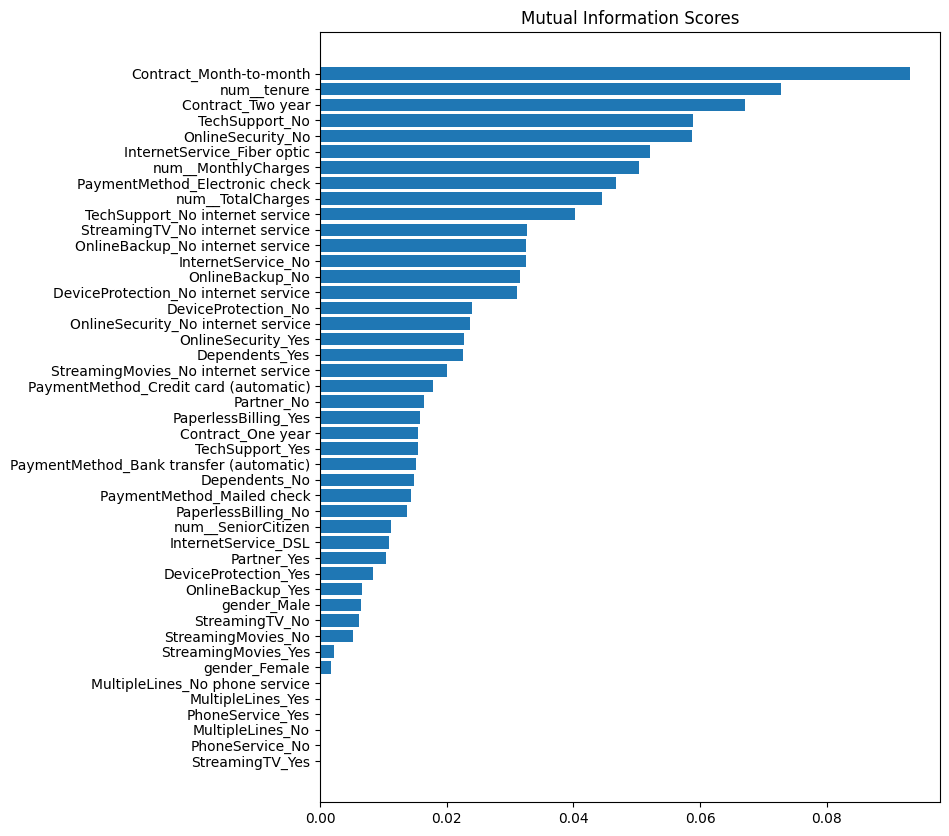

In [ ]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

## Split into training and testing sets

Dataframe names at this point:
* `X_transformed_df`
* `y_series`

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y_encoded, test_size=0.25, random_state=42)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(5282, 45)

(1761, 45)

(5282,)

(1761,)

In [ ]:
display(X_train.head())

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges
6607,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.439916,-1.277445,-1.311546,-0.996980
2598,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.439916,-1.033122,0.345265,-0.776347
2345,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,-0.439916,-1.155283,-1.486035,-0.970400
4093,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,-0.439916,-0.137274,0.373516,-0.030046
693,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,-0.439916,-1.196004,0.343603,-0.888628


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

LogisticRegression()

## Make Predictions

### Subtask:
Use the trained Logistic Regression model to make predictions on the test set.

In [ ]:
# Assuming lr_model is your trained Logistic Regression model
# Assuming X_test is your test features DataFrame

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

# Display the first few predictions
display("First 10 predictions:")
display(lr_pred[:10])

'First 10 predictions:'

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
display(y_test[:10])

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

## Evaluate the Model

### Subtask:
Evaluate the model's performance using appropriate classification metrics.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
def evaluate_model(y_test, y_pred):
  # Calculate common classification metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]) # Get probabilities for ROC AUC

  # Calculate the confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Display the evaluation metrics
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print(f"ROC AUC: {roc_auc:.4f}")

  # Display the confusion matrix
  display("Confusion Matrix:")
  display(conf_matrix)

evaluate_model(y_test, lr_pred)

Accuracy: 0.8126
Precision: 0.6840
Recall: 0.5783
F1-Score: 0.6267
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1154,  128],
       [ 202,  277]])

## Address the imbalance between Churn and No Churn

In [ ]:
y_series = pd.Series(y_train)
y_series.value_counts()

,count
0,3892
1,1390


## Imbalance handling techniques

Techniques for Handling Imbalanced Data:
1. Oversampling: Increasing the number of instances in the minority class to balance the class distribution.
   Example: SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class.

2. Undersampling: Decreasing the number of instances in the majority class to balance the class distribution.
   Example: Random Undersampling randomly removes instances from the majority class.

Importance of Appropriate Evaluation Metrics:
When dealing with imbalanced datasets, relying solely on accuracy can be misleading. A model might achieve high accuracy by simply predicting the majority class for all instances. More informative metrics include:
- Precision: The proportion of correctly predicted positive instances among all instances predicted as positive. Useful when the cost of a false positive is high.
- Recall (Sensitivity): The proportion of correctly predicted positive instances among all actual positive instances. Useful when the cost of a false negative is high (e.g., missing a fraudulent transaction or a disease).
- F1-Score: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.
- ROC AUC (Receiver Operating Characteristic Area Under the Curve): Measures the ability of a classifier to distinguish between classes. A higher AUC indicates better performance.


## Apply a resampling technique (e.g., smote)

### Subtask:
Demonstrate how to apply an oversampling technique like SMOTE to the training data to balance the classes.


In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the shape of the resampled data
display("Shape of resampled training data:")
display(X_train_resampled.shape)
display(y_train_resampled.shape)

# Display the value counts of the resampled target variable
display("Value counts of resampled target variable:")
display(pd.Series(y_train_resampled).value_counts())

'Shape of resampled training data:'

(7784, 45)

(7784,)

'Value counts of resampled target variable:'

,count
1,3892
0,3892


## Train and evaluate model with balanced data

### Subtask:
Train the Logistic Regression model (or another model) on the balanced training data and evaluate its performance, comparing metrics to the previous model trained on imbalanced data.


**Reasoning**:
Train a new Logistic Regression model on the resampled training data, make predictions on the test set, and evaluate its performance using the provided function to compare against the previous model's results.



In [ ]:
# Instantiate a new Logistic Regression model
lr_model_balanced = LogisticRegression(max_iter=1000) # Increase max_iter for convergence

# Train the new Logistic Regression model on the resampled training data
lr_model_balanced.fit(X_train_resampled, y_train_resampled)

# Use the trained model to make predictions on the original, imbalanced test set
lr_pred_balanced = lr_model_balanced.predict(X_test)

# Evaluate the performance of the model trained on balanced data
display("Evaluation of Logistic Regression Model trained on Balanced Data:")
evaluate_model(y_test, lr_pred_balanced)

'Evaluation of Logistic Regression Model trained on Balanced Data:'

Accuracy: 0.7558
Precision: 0.5337
Recall: 0.8100
F1-Score: 0.6434
ROC AUC: 0.8602


'Confusion Matrix:'

array([[943, 339],
       [ 91, 388]])

## Summary:

### Data Analysis Key Findings

*   The initial training data exhibits significant class imbalance, with the "No Churn" class having 3892 instances and the "Churn" class having 1390 instances, a ratio of nearly 3:1.
*   Applying the SMOTE oversampling technique successfully balanced the training data, resulting in 3892 instances for both the "No Churn" and "Churn" classes in the resampled dataset.
*   Training a Logistic Regression model on the balanced data and evaluating it on the original, imbalanced test set yielded the following metrics: Accuracy: 0.7558, Precision: 0.5337, Recall: 0.8100, F1-Score: 0.6434, and ROC AUC: 0.8602.

### Insights or Next Steps

*   The balanced model shows a significantly improved Recall (0.8100) compared to what would typically be expected from a model trained on imbalanced data, indicating better identification of the minority "Churn" class.
*   While Recall improved, Precision (0.5337) is still moderate. Further steps could involve tuning the model hyperparameters or exploring alternative classification algorithms and resampling techniques to potentially improve the trade-off between Precision and Recall.


Balancing the data decreased the accuracy by 6 points, decreased the precision by 15 points, increased the recall by 23 points, kept the F1 and ROC-AUC scores the same.

This indicated that our balanced dataset made it where our model could prioritize minimizing false negatives.

I think in the area of customer churn, this is a good trade-off because we should be focusing on identifying as many potential customers that will leave as possible even if we identify some that will not leave

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions = {'C': uniform(loc=0, scale=4)}
clf = RandomizedSearchCV(lr_model, distributions, random_state=0, scoring='recall', cv=5, n_iter=10)
search = clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
search.best_params_

{'C': np.float64(1.6946191973556188)}

In [ ]:
GridSearchLR = search.best_estimator_

In [ ]:
# Train the new Logistic Regression model on the resampled training data
GridSearchLR.fit(X_train_resampled, y_train_resampled)

# Use the trained model to make predictions on the original, imbalanced test set
lr_pred_balanced = GridSearchLR.predict(X_test)

# Evaluate the performance of the model trained on balanced data
display("Evaluation of Logistic Regression Model trained on Balanced Data:")
evaluate_model(y_test, lr_pred_balanced)

'Evaluation of Logistic Regression Model trained on Balanced Data:'

Accuracy: 0.7570
Precision: 0.5353
Recall: 0.8079
F1-Score: 0.6439
ROC AUC: 0.8602


'Confusion Matrix:'

array([[946, 336],
       [ 92, 387]])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_resampled, y_train_resampled)

tree_pred = tree_clf.predict(X_test)

display("Evaluation of Decision Tree Model trained on Balanced Data:")
evaluate_model(y_test, tree_pred)


'Evaluation of Decision Tree Model trained on Balanced Data:'

Accuracy: 0.7286
Precision: 0.5009
Recall: 0.5553
F1-Score: 0.5267
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1017,  265],
       [ 213,  266]])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # Changed from GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform # Import distributions

# Initialize a Decision Tree Classifier model
tree_clf = DecisionTreeClassifier(random_state=42) # Set random_state for reproducibility

# Define the parameter distributions to sample from (Changed from param_grid)
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(5, 21), # Example: random integers between 5 and 20
    'min_samples_split': randint(2, 21), # Example: random integers between 2 and 20
    'min_samples_leaf': randint(1, 11),   # Example: random integers between 1 and 10
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8] # Still can use a list for categorical-like parameters
}

# Set up RandomizedSearchCV
# estimator: the model to tune
# param_distributions: the dictionary of parameter distributions to sample from (Changed from param_grid)
# scoring: the metric to optimize ('recall' is often relevant for churn)
# cv: number of cross-validation folds
# n_iter: number of parameter settings that are sampled (e.g., 50, adjust based on computational budget)
# random_state: for reproducibility
# n_jobs: number of CPU cores to use (-1 means all available)
# verbose: controls the verbosity: higher values provide more detail
random_search = RandomizedSearchCV(tree_clf, param_distributions=param_distributions,
                                   scoring='recall', cv=5, n_jobs=-1, verbose=2,
                                   n_iter=50, random_state=42) # Added n_iter and random_state

# Fit the randomized search to the resampled training data
# This will train multiple models for each parameter combination
random_search.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
display(random_search.best_params_)

# You can also access the best model directly: random_search.best_estimator_
# And the best score achieved: random_search.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found by RandomizedSearchCV:


{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
display(random_search.best_score_)

np.float64(0.8050387584108556)

In [ ]:
best_tree_clf = random_search.best_estimator_
tree_preds = best_tree_clf.predict(X_test)
evaluate_model(y_test, tree_preds)

Accuracy: 0.7428
Precision: 0.5207
Recall: 0.6827
F1-Score: 0.5908
ROC AUC: 0.8602


'Confusion Matrix:'

array([[981, 301],
       [152, 327]])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

rf_preds = rf_clf.predict(X_test)

evaluate_model(y_test, rf_preds)

Accuracy: 0.7774
Precision: 0.5995
Recall: 0.5470
F1-Score: 0.5721
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1107,  175],
       [ 217,  262]])

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200,random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

rf_preds = rf_clf.predict(X_test)

evaluate_model(y_test, rf_preds)

Accuracy: 0.7808
Precision: 0.6069
Recall: 0.5511
F1-Score: 0.5777
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1111,  171],
       [ 215,  264]])

In [ ]:
rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

rf_preds = rf_clf.predict(X_test)

evaluate_model(y_test, rf_preds)

Accuracy: 0.7865
Precision: 0.6195
Recall: 0.5574
F1-Score: 0.5868
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1118,  164],
       [ 212,  267]])

In [ ]:
from scipy.stats import randint, uniform

# Initialize a Random Forest Classifier model
rf_clf = RandomForestClassifier(random_state=42) # Set random_state for reproducibility

# Define the parameter distributions to sample from
param_distributions = {
    'n_estimators': randint(100, 500), # Number of trees in the forest
    'criterion': ['gini', 'entropy'], # Function to measure the quality of a split
    'max_depth': randint(5, 31), # Maximum depth of the tree (or None)
    'min_samples_split': randint(2, 21), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 11),   # Minimum number of samples required to be at a leaf node
}

# Set up RandomizedSearchCV
# estimator: the model to tune
# param_distributions: the dictionary of parameter distributions to sample from
# scoring: the metric to optimize ('recall' is relevant for churn)
# cv: number of cross-validation folds
# n_iter: number of parameter settings that are sampled (e.g., 100 or more for Random Forest)
# random_state: for reproducibility
# n_jobs: number of CPU cores to use (-1 means all available)
# verbose: controls the verbosity
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_distributions,
                                      scoring='recall', cv=5, n_jobs=-1, verbose=2,
                                      n_iter=20, random_state=42) # Increased n_iter as Random Forests have more parameters

# Fit the randomized search to the resampled training data
# This will train multiple models for each parameter combination
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for Random Forest:")
display(random_search_rf.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by RandomizedSearchCV for Random Forest:


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 413}

In [ ]:
# You can access the best model directly: random_search_rf.best_estimator_
# And the best score achieved: random_search_rf.best_score_
best_rf_clf = random_search_rf.best_estimator_
rf_preds = best_rf_clf.predict(X_test)
evaluate_model(y_test, rf_preds)

Accuracy: 0.7825
Precision: 0.5808
Recall: 0.7203
F1-Score: 0.6431
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1033,  249],
       [ 134,  345]])

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_resampled, y_train_resampled)

svm_preds = svm_clf.predict(X_test)

evaluate_model(y_test, svm_preds)

Accuracy: 0.7717
Precision: 0.5586
Recall: 0.7662
F1-Score: 0.6461
ROC AUC: 0.8602


'Confusion Matrix:'

array([[992, 290],
       [112, 367]])

In [ ]:
from scipy.stats import reciprocal

svm_clf = SVC(random_state=42)

param_distributions = {
    "C": reciprocal(20, 200000),
    "kernel": ["linear", "rbf", "poly"],
    "degree": [2, 3]
}

random_search_svm_clf = RandomizedSearchCV(svm_clf, param_distributions=param_distributions,
                                      scoring='recall', n_jobs=-1, verbose=2,
                                      n_iter=1, random_state=42)

random_search_svm_clf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for SVC:")
display(random_search_svm_clf.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by RandomizedSearchCV for SVC:


{'C': np.float64(629.7823295913721), 'degree': 2, 'kernel': 'poly'}

In [ ]:
best_svm_clf = random_search_svm_clf.best_estimator_
svm_preds = best_svm_clf.predict(X_test)
evaluate_model(y_test, svm_preds)

Accuracy: 0.7984
Precision: 0.6235
Recall: 0.6534
F1-Score: 0.6381
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1093,  189],
       [ 166,  313]])

## Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

lin_svm_clf = LinearSVC(random_state=42)
lin_svm_clf.fit(X_train_resampled, y_train_resampled)

lin_svm_preds = lin_svm_clf.predict(X_test)

evaluate_model(y_test, lin_svm_preds)

Accuracy: 0.7553
Precision: 0.5325
Recall: 0.8205
F1-Score: 0.6459
ROC AUC: 0.8602


'Confusion Matrix:'

array([[937, 345],
       [ 86, 393]])

In [ ]:
from sklearn.svm import LinearSVC
from scipy.stats import reciprocal

lin_svm_clf = LinearSVC(random_state=42)

param_distributions = {
    "C": reciprocal(20, 200000),
    "loss": ["hinge", "squared_hinge"],
    "dual": [True, False],
    "class_weight": [None, "balanced"],
}

random_search_lin_clf = RandomizedSearchCV(lin_svm_clf, param_distributions=param_distributions,
                                      scoring='recall', cv=5, n_jobs=-1, verbose=2,
                                      n_iter=20, random_state=42) # Increased n_iter as Random Forests have more parameters

random_search_lin_clf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for LinearSVC:")
display(random_search_lin_clf.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py", line 321, in fit
    self.coef_, self.intercept_, n_i

Best parameters found by RandomizedSearchCV for LinearSVC:


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': np.float64(167.7278956080511),
 'class_weight': 'balanced',
 'dual': True,
 'loss': 'squared_hinge'}

In [ ]:
# You can access the best model directly: random_search_lin_clf.best_estimator_
# And the best score achieved: random_search_lin_clf.best_score_
best_lin_svm_clf = random_search_lin_clf.best_estimator_
lin_svm_preds = best_lin_svm_clf.predict(X_test)
evaluate_model(y_test, lin_svm_preds)

## XGBoost

In [ ]:
from xgboost import XGBClassifier
import pandas as pd

# Initialize the XGBoost Classifier model
# Use scale_pos_weight to handle potential imbalance, even with SMOTE
# (sometimes helpful, or can be omitted if SMOTE fully balances and model handles it)
# A common value for scale_pos_weight is count(negative_class) / count(positive_class)
# Since we used SMOTE and the classes are balanced in X_train_resampled,
# we can initially set scale_pos_weight=1 or omit it.
# Let's omit it for now as SMOTE handled the balance in training data.
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1) # Set random_state and eval_metric

# Train the model using the resampled training data
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Use the trained model to make predictions on the original, imbalanced test set
xgb_preds = xgb_clf.predict(X_test)

# Evaluate the performance of the XGBoost model
display("Evaluation of XGBoost Model trained on Balanced Data:")
evaluate_model(y_test, xgb_preds)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import pandas as pd

# Assuming X_train_resampled and y_train_resampled are your resampled training data
# Assuming evaluate_model function is defined

# Initialize the XGBoost Classifier model
# We'll tune some key hyperparameters using RandomizedSearchCV
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter distributions to sample from
param_distributions = {
    'n_estimators': randint(100, 1000), # Number of boosting rounds (trees)
    'learning_rate': uniform(0.01, 0.3), # Step size shrinkage used in update to prevent overfitting
    'max_depth': randint(3, 10), # Maximum depth of a tree
    'subsample': uniform(0.6, 0.4), # Fraction of samples used for fitting the individual base learners
    'colsample_bytree': uniform(0.6, 0.4), # Fraction of features used for fitting the individual base learners
    'gamma': uniform(0, 0.5), # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': uniform(0, 1), # L1 regularization term on weights
    'reg_lambda': uniform(1, 2) # L2 regularization term on weights
}

# Set up RandomizedSearchCV
# estimator: the model to tune
# param_distributions: the dictionary of parameter distributions to sample from
# scoring: the metric to optimize ('recall' is relevant for churn)
# cv: number of cross-validation folds
# n_iter: number of parameter settings that are sampled (adjust based on computational budget)
# random_state: for reproducibility
# n_jobs: number of CPU cores to use (-1 means all available)
# verbose: controls the verbosity
random_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_distributions,
                                       scoring='recall', cv=5, n_jobs=-1, verbose=2,
                                       n_iter=20, random_state=42) # Increased n_iter for more thorough search

# Fit the randomized search to the resampled training data
random_search_xgb.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for XGBoost:")
display(random_search_xgb.best_params_)

# You can access the best model directly: random_search_xgb.best_estimator_
# And the best score achieved: random_search_xgb.best_score_

In [ ]:
xgb_clf = random_search_xgb.best_estimator_

xgb_preds = xgb_clf.predict(X_test)

evaluate_model(y_test, xgb_preds)

Accuracy: 0.7995
Precision: 0.6198
Recall: 0.6806
F1-Score: 0.6488
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1082,  200],
       [ 153,  326]])

## Neural Network

Architecture
Input: 46
Hidden Units: 10
Layers: 2
Output: Sigmoid Function

In [ ]:
import torch
from torch import nn

# Define the Neural Network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        # Define the layers
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU() # Activation function for hidden layers
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_out = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid() # Activation function for the output layer

    def forward(self, x):
        # Define the forward pass
        # x = self.layer_1(x)
        # x = self.relu(x)
        # x = self.layer_2(x)
        # x = self.relu(x)
        # x = self.layer_out(x)
        # x = self.sigmoid(x) # Apply sigmoid to the output

        return self.sigmoid(self.layer_out(self.relu(self.layer_2(self.relu(self.layer_1(x))))))

# Define the network parameters
input_size = 45 # Based on the shape of X_transformed_df
hidden_size = 10
output_size = 1 # For binary classification (churn or not churn)

# Instantiate the model
model = SimpleNN(input_size, hidden_size, output_size)

print("Neural network model defined:")
print(model)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
import os

# Assuming X_train_resampled, y_train_resampled, X_test, and y_test are your data (NumPy arrays or pandas DataFrames)

# Convert data to PyTorch tensors
# Ensure data types are appropriate (float for features, float or long for target depending on loss function)
# For binary classification with Sigmoid output and BCELoss, target should be float.
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1) # Add a dimension for the output layer

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1) # Add a dimension for the output layer

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 8 # Define your desired batch size

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=os.cpu_count())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count()) # No need to shuffle test data

print("Data prepared for DataLoaders.")
print(f"Number of training batches (batch size={batch_size}): {len(train_loader)}")
print(f"Number of testing batches (batch size={batch_size}): {len(test_loader)}")
print(f"{X_train_tensor.shape}")
print(f"{y_train_tensor.shape}")

In [ ]:
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

In [ ]:
features, label = next(iter(test_loader))
display(features.shape)
# View the first 5 outputs of the forward pass on the test data
model.eval()
with torch.inference_mode():
  y_logits = torch.round(model(features))
y_logits

torch.Size([8, 45])

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [ ]:
torch.manual_seed(42)
epochs = 5

criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

for epoch in range(epochs):
  model.train()

  for batch, (X, y) in enumerate(train_loader):
    y_pred = model(X) # output probs

    loss = criterion(y_pred, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


In [ ]:
features, labels = next(iter(test_loader))

model.eval()
with torch.inference_mode():
  y_logits = torch.round(model(features))
y_logits

In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Assuming model is your trained PyTorch neural network
# Assuming test_loader is your DataLoader for the test set
# Assuming y_test_tensor is your encoded true labels for the test set as a tensor

# Set the model to evaluation mode
model.eval()

# Lists to store true labels and predicted labels
all_labels = []
all_predictions = []
all_probabilities = [] # To store probabilities for ROC AUC

# Disable gradient calculations for evaluation
with torch.inference_mode():
    for features, labels in test_loader:
        # Forward pass
        outputs = model(features) # Outputs are probabilities from the Sigmoid

        # Store labels and predictions
        # Convert probabilities to predicted class (0 or 1)
        predicted_classes = (outputs > 0.5).squeeze().long()

        # Ensure arrays are 1-dimensional before appending for concatenation
        all_labels.append(labels.squeeze().numpy().reshape(-1))
        all_predictions.append(predicted_classes.numpy().reshape(-1))
        all_probabilities.append(outputs.squeeze().numpy().reshape(-1)) # Reshape probabilities too


# Concatenate results from all batches
all_labels = np.concatenate(all_labels)
all_predictions = np.concatenate(all_predictions)
all_probabilities = np.concatenate(all_probabilities)

# Evaluate the model using scikit-learn metrics
# Note: The scikit-learn metrics expect numpy arrays

# Calculate common classification metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
# ROC AUC requires probabilities of the positive class (which is 1 in our case)
roc_auc = roc_auc_score(all_labels, all_probabilities)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Display the evaluation metrics
print("Evaluation of PyTorch Neural Network Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Display the confusion matrix
display("Confusion Matrix:")
display(conf_matrix)

In [ ]:
# Define the network parameters
input_size = 45 # Based on the shape of X_transformed_df
hidden_size = 100
output_size = 1 # For binary classification (churn or not churn)

# Instantiate the model
model_1 = SimpleNN(input_size, hidden_size, output_size)

print("Neural network model defined:")
print(model_1)

In [ ]:
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001) # Adam optimizer

In [ ]:
torch.manual_seed(42)
epochs = 5

for epoch in range(epochs):
  model_1.train()

  for batch, (X, y) in enumerate(train_loader):
    y_pred = model_1(X) # output probs

    loss = criterion(y_pred, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


In [ ]:
features, labels = next(iter(test_loader))

model_1.eval()
with torch.inference_mode():
  y_logits = torch.round(model_1(features))
y_logits

In [ ]:
# Set the model to evaluation mode
model_1.eval()

# Lists to store true labels and predicted labels
all_labels = []
all_predictions = []
all_probabilities = [] # To store probabilities for ROC AUC

# Disable gradient calculations for evaluation
with torch.inference_mode():
    for features, labels in test_loader:
        # Forward pass
        outputs = model_1(features) # Outputs are probabilities from the Sigmoid

        # Store labels and predictions
        # Convert probabilities to predicted class (0 or 1)
        predicted_classes = (outputs > 0.5).squeeze().long()

        # Ensure arrays are 1-dimensional before appending for concatenation
        all_labels.append(labels.squeeze().numpy().reshape(-1))
        all_predictions.append(predicted_classes.numpy().reshape(-1))
        all_probabilities.append(outputs.squeeze().numpy().reshape(-1)) # Reshape probabilities too


# Concatenate results from all batches
all_labels = np.concatenate(all_labels)
all_predictions = np.concatenate(all_predictions)
all_probabilities = np.concatenate(all_probabilities)

# Evaluate the model using scikit-learn metrics
# Note: The scikit-learn metrics expect numpy arrays

# Calculate common classification metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
# ROC AUC requires probabilities of the positive class (which is 1 in our case)
roc_auc = roc_auc_score(all_labels, all_probabilities)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Display the evaluation metrics
print("Evaluation of PyTorch Neural Network Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Display the confusion matrix
display("Confusion Matrix:")
display(conf_matrix)

Evaluation of PyTorch Neural Network Model:
Accuracy: 0.7666
Precision: 0.5538
Recall: 0.7307
F1-Score: 0.6301
ROC AUC: 0.8370


'Confusion Matrix:'

array([[1000,  282],
       [ 129,  350]])

Based on the Mutual Information scores, which indicate the dependence between each feature and the target variable (Churn), here are some potential features you could engineer:

*   **Interaction between Contract Type and Tenure**: The MI scores show that 'Contract_Month-to-month' and 'num__tenure' are among the most informative features. Creating interaction terms between different contract types and tenure could capture how the churn risk changes over time depending on the contract. For example, the churn rate for month-to-month customers might decrease significantly after a certain tenure, while it might remain low for two-year contract customers regardless of tenure.

*   **Combining Internet Service and Online Security/Tech Support**: 'InternetService_Fiber optic', 'OnlineSecurity_No', and 'TechSupport_No' have relatively high MI scores. You could engineer features that combine these, such as a feature indicating whether a customer has Fiber Optic internet AND no online security or tech support. This could highlight specific pain points that lead to churn.

*   **Payment Method and Paperless Billing Interactions**: 'PaymentMethod_Electronic check' and 'PaperlessBilling_Yes' also show decent MI scores. An interaction term between these could reveal if customers using electronic checks and paperless billing are more likely to churn, potentially due to issues with the billing process or online payment system.

*   **Ratio of Monthly Charges to Tenure**: While 'num__MonthlyCharges' and 'num__tenure' are individually important, their relationship might also be informative. A feature representing the ratio of monthly charges to the customer's tenure could capture if customers paying high monthly charges for a short period are more likely to churn.

*   **Simplified Contract Length**: Instead of separate one-hot encoded columns for each contract type, you could engineer a single numerical or ordinal feature representing the contract length (e.g., 1 for month-to-month, 12 for one year, 24 for two year). This might help models capture the trend of churn risk decreasing with longer contracts.

*   **Group features with low MI scores**: Features with very low MI scores (close to zero) might not be very informative on their own. While they might still be useful in combination with other features, you could consider if any of these features can be grouped or simplified if they represent similar concepts (e.g., different streaming services if their individual MI scores are low). However, be cautious with this approach as even features with low individual MI can contribute when combined.